This notebook implements autoencoder with sparse encoding. With 100 activation units in the hidden layer. 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('/tmp/data/', one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
learning_rate = 0.0005
num_in = 784
num_h = 100
num_out = 784
num_epochs = 1200
img_size = [28,28]
batch_size = 100

In [5]:
x = tf.placeholder(tf.float32, [None,num_in])

In [6]:
rho = tf.fill([1,num_h], 0.05)

In [7]:
weights = {
    'in':tf.Variable(tf.random_normal([num_in, num_h])),
    'h':tf.Variable(tf.random_normal([num_h, num_out]))
}

biases = {
    'in':tf.Variable(tf.random_normal([1,num_h])),
    'h':tf.Variable(tf.random_normal([1,num_out]))
}

In [8]:
h_layer = tf.add(tf.matmul(x, weights['in']), biases['in'])
h_layer = tf.nn.sigmoid(h_layer)
out_layer = tf.add(tf.matmul(h_layer, weights['h']), biases['h'])

In [9]:
rho_cap = tf.Variable(tf.zeros([1, num_h]))
rho_cap = rho_cap + h_layer/mnist.train.num_examples

In [10]:
loss_op = tf.losses.mean_squared_error(out_layer, x)

In [11]:
#optimizer = tf.train.AdamOptimizer(learning_rate)

In [12]:
#train_op = optimizer.minimize(loss_op)

In [13]:
ones = tf.Variable(tf.ones([1,num_h]))

In [14]:
kl_loss = tf.multiply(rho, tf.log(tf.div(rho, rho_cap))) + tf.multiply((ones-rho), tf.log(tf.div(ones-rho, ones-rho_cap)))

In [15]:
loss_op1 = tf.reduce_mean(kl_loss)

In [16]:
loss_op2 = loss_op1 + loss_op

In [17]:
optimizer1= tf.train.AdamOptimizer(5e-6)

In [18]:
train_op1 = optimizer1.minimize(loss_op2)

In [19]:
init = tf.global_variables_initializer()

In [20]:
saver = tf.train.Saver()

In [21]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        num_batches = mnist.train.num_examples/batch_size
        c1=0
        c=0
        for _ in range(num_batches):
            batch_x, _ = mnist.train.next_batch(batch_size)
            _, cost1, cost = sess.run([train_op1, loss_op1, loss_op], feed_dict={x:batch_x})
            c1 += cost1/num_batches
            c += cost/num_batches
        print('after '+str(epoch+1)+' epochs '+'error cost is '+str(c)+','+'sparse encoding cost is '+str(c1))
    save_path = saver.save(sess, '/tmp/sparse_encoder2.1.ckpt')

after 1 epochs error cost is 44.40120785799894,sparse encoding cost is 0.2998440212553195
after 2 epochs error cost is 42.23136731234466,sparse encoding cost is 0.2904349067536269
after 3 epochs error cost is 40.222611881602916,sparse encoding cost is 0.2858033672787928
after 4 epochs error cost is 38.35170708396216,sparse encoding cost is 0.28208454879847444
after 5 epochs error cost is 36.601753942316236,sparse encoding cost is 0.2787801870974629
after 6 epochs error cost is 34.959361142245186,sparse encoding cost is 0.275693101178516
after 7 epochs error cost is 33.413801165494,sparse encoding cost is 0.2727217495983296
after 8 epochs error cost is 31.95622245441785,sparse encoding cost is 0.26980559305711205
after 9 epochs error cost is 30.579385535500265,sparse encoding cost is 0.2669075074520976
after 10 epochs error cost is 29.2775368395719,sparse encoding cost is 0.2640023743564433
after 11 epochs error cost is 28.04518903905694,sparse encoding cost is 0.2610745003548536
after 

after 90 epochs error cost is 1.626292924880982,sparse encoding cost is 0.015116351776840993
after 91 epochs error cost is 1.5841563161936671,sparse encoding cost is 0.013944285129281593
after 92 epochs error cost is 1.5439823725006778,sparse encoding cost is 0.012835901906205833
after 93 epochs error cost is 1.505669036778538,sparse encoding cost is 0.011789360131052404
after 94 epochs error cost is 1.4690981836752466,sparse encoding cost is 0.010802972157570447
after 95 epochs error cost is 1.434171159917659,sparse encoding cost is 0.009875122969123445
after 96 epochs error cost is 1.400821743878451,sparse encoding cost is 0.009004214529625399
after 97 epochs error cost is 1.3690124524723422,sparse encoding cost is 0.008188624288040125
after 98 epochs error cost is 1.3386590355092818,sparse encoding cost is 0.007426692326976494
after 99 epochs error cost is 1.3096821639754563,sparse encoding cost is 0.006716706742617219
after 100 epochs error cost is 1.2820200057463231,sparse encodin

after 176 epochs error cost is 0.6030858269604772,sparse encoding cost is 5.633099569024582e-08
after 177 epochs error cost is 0.5998307411237198,sparse encoding cost is 5.642129859237151e-08
after 178 epochs error cost is 0.5966088936545634,sparse encoding cost is 5.6323492048901156e-08
after 179 epochs error cost is 0.5934198147600349,sparse encoding cost is 5.647991156623985e-08
after 180 epochs error cost is 0.590261950384487,sparse encoding cost is 5.631860022054462e-08
after 181 epochs error cost is 0.5871339249610906,sparse encoding cost is 5.6218302662810763e-08
after 182 epochs error cost is 0.5840359452637757,sparse encoding cost is 5.6024452994372275e-08
after 183 epochs error cost is 0.5809676223451441,sparse encoding cost is 5.6362939870072386e-08
after 184 epochs error cost is 0.5779268760030924,sparse encoding cost is 5.62976168794193e-08
after 185 epochs error cost is 0.5749124444614757,sparse encoding cost is 5.630539800062132e-08
after 186 epochs error cost is 0.57192

after 261 epochs error cost is 0.39718672541054845,sparse encoding cost is 5.630673927276507e-08
after 262 epochs error cost is 0.3953294525905086,sparse encoding cost is 5.59820531588105e-08
after 263 epochs error cost is 0.393481777039441,sparse encoding cost is 5.6026926658474174e-08
after 264 epochs error cost is 0.3916439924998716,sparse encoding cost is 5.6322967209739076e-08
after 265 epochs error cost is 0.3898158652132211,sparse encoding cost is 5.6249184381003495e-08
after 266 epochs error cost is 0.38799742877483373,sparse encoding cost is 5.625679632198004e-08
after 267 epochs error cost is 0.38618841404264603,sparse encoding cost is 5.620374381656098e-08
after 268 epochs error cost is 0.38438877040689634,sparse encoding cost is 5.6076668525665e-08
after 269 epochs error cost is 0.3825984121994539,sparse encoding cost is 5.649644915127865e-08
after 270 epochs error cost is 0.38081757301634034,sparse encoding cost is 5.633518986898746e-08
after 271 epochs error cost is 0.379

after 346 epochs error cost is 0.26903146619146534,sparse encoding cost is 5.568327048101972e-08
after 347 epochs error cost is 0.2678314177556469,sparse encoding cost is 5.5471100818170835e-08
after 348 epochs error cost is 0.26663748378103413,sparse encoding cost is 5.581457841039782e-08
after 349 epochs error cost is 0.2654497227343646,sparse encoding cost is 5.5664209681212575e-08
after 350 epochs error cost is 0.2642681433395905,sparse encoding cost is 5.59460400495482e-08
after 351 epochs error cost is 0.2630927391485736,sparse encoding cost is 5.569675568427673e-08
after 352 epochs error cost is 0.26192352419549747,sparse encoding cost is 5.6298732231270574e-08
after 353 epochs error cost is 0.2607601517980747,sparse encoding cost is 5.59253967289599e-08
after 354 epochs error cost is 0.25960301391103063,sparse encoding cost is 5.544397116611061e-08
after 355 epochs error cost is 0.2584520381960001,sparse encoding cost is 5.536451388495191e-08
after 356 epochs error cost is 0.25

after 431 epochs error cost is 0.18651438718492355,sparse encoding cost is 5.5521776674409426e-08
after 432 epochs error cost is 0.18574920960448008,sparse encoding cost is 5.5096634751934834e-08
after 433 epochs error cost is 0.18498845764181804,sparse encoding cost is 5.54973386745029e-08
after 434 epochs error cost is 0.18423178298906853,sparse encoding cost is 5.5504160233578146e-08
after 435 epochs error cost is 0.1834793995727191,sparse encoding cost is 5.569289669438152e-08
after 436 epochs error cost is 0.18273116057569333,sparse encoding cost is 5.543582654416406e-08
after 437 epochs error cost is 0.18198699506846355,sparse encoding cost is 5.5760147568342016e-08
after 438 epochs error cost is 0.18124710698019367,sparse encoding cost is 5.5942822841230265e-08
after 439 epochs error cost is 0.18051125228405004,sparse encoding cost is 5.525134330174422e-08
after 440 epochs error cost is 0.17977968798442318,sparse encoding cost is 5.567576874522148e-08
after 441 epochs error cost

after 516 epochs error cost is 0.13482162922620775,sparse encoding cost is 5.5380091371727234e-08
after 517 epochs error cost is 0.1343547895008868,sparse encoding cost is 5.496709945873592e-08
after 518 epochs error cost is 0.13389077114787976,sparse encoding cost is 5.578993912019368e-08
after 519 epochs error cost is 0.13342967735095462,sparse encoding cost is 5.5129724468759954e-08
after 520 epochs error cost is 0.13297142695296893,sparse encoding cost is 5.522405935209916e-08
after 521 epochs error cost is 0.13251619692553157,sparse encoding cost is 5.513628847547186e-08
after 522 epochs error cost is 0.1320637939463961,sparse encoding cost is 5.539012524929438e-08
after 523 epochs error cost is 0.1316142586144533,sparse encoding cost is 5.5662210672577095e-08
after 524 epochs error cost is 0.131167570664124,sparse encoding cost is 5.547627658586409e-08
after 525 epochs error cost is 0.1307236939668656,sparse encoding cost is 5.579470029266015e-08
after 526 epochs error cost is 0.

after 601 epochs error cost is 0.1042623998766596,sparse encoding cost is 5.55439641141737e-08
after 602 epochs error cost is 0.10399516690861096,sparse encoding cost is 5.5905345652201344e-08
after 603 epochs error cost is 0.10372969376769929,sparse encoding cost is 5.5331011568879055e-08
after 604 epochs error cost is 0.10346595174886963,sparse encoding cost is 5.57623597979335e-08
after 605 epochs error cost is 0.1032039905271747,sparse encoding cost is 5.569991803223604e-08
after 606 epochs error cost is 0.1029436954720455,sparse encoding cost is 5.504845980588222e-08
after 607 epochs error cost is 0.10268510393121029,sparse encoding cost is 5.5933060164906324e-08
after 608 epochs error cost is 0.10242829519239338,sparse encoding cost is 5.579294271352746e-08
after 609 epochs error cost is 0.10217305933887315,sparse encoding cost is 5.5478812945673146e-08
after 610 epochs error cost is 0.10191950401121903,sparse encoding cost is 5.547897679682801e-08
after 611 epochs error cost is 

after 686 epochs error cost is 0.0868410668996246,sparse encoding cost is 5.587896686940688e-08
after 687 epochs error cost is 0.08668951111760999,sparse encoding cost is 5.640347261894686e-08
after 688 epochs error cost is 0.08653904268687415,sparse encoding cost is 5.599539558173462e-08
after 689 epochs error cost is 0.08638958920132031,sparse encoding cost is 5.6295305244899185e-08
after 690 epochs error cost is 0.08624112849885762,sparse encoding cost is 5.610680554339477e-08
after 691 epochs error cost is 0.0860938204147598,sparse encoding cost is 5.6145350723371904e-08
after 692 epochs error cost is 0.08594744828614316,sparse encoding cost is 5.594343962462225e-08
after 693 epochs error cost is 0.08580213866450564,sparse encoding cost is 5.669905307441197e-08
after 694 epochs error cost is 0.0856577377427709,sparse encoding cost is 5.5883660824530455e-08
after 695 epochs error cost is 0.08551436853679754,sparse encoding cost is 5.6333415469370326e-08
after 696 epochs error cost i

after 771 epochs error cost is 0.07707557821815664,sparse encoding cost is 5.628411260131954e-08
after 772 epochs error cost is 0.07699207827448842,sparse encoding cost is 5.629360633075855e-08
after 773 epochs error cost is 0.07690924429080707,sparse encoding cost is 5.6043104915591934e-08
after 774 epochs error cost is 0.07682700502601536,sparse encoding cost is 5.631938630043268e-08
after 775 epochs error cost is 0.07674535618586968,sparse encoding cost is 5.65899682023676e-08
after 776 epochs error cost is 0.07666422024369236,sparse encoding cost is 5.6667581386126306e-08
after 777 epochs error cost is 0.0765837699310346,sparse encoding cost is 5.689505780604904e-08
after 778 epochs error cost is 0.07650394756685602,sparse encoding cost is 5.667997788288467e-08
after 779 epochs error cost is 0.07642463200471616,sparse encoding cost is 5.6673878874717553e-08
after 780 epochs error cost is 0.07634594294157897,sparse encoding cost is 5.667441423637142e-08
after 781 epochs error cost i

after 856 epochs error cost is 0.07182243085720315,sparse encoding cost is 5.692098841724269e-08
after 857 epochs error cost is 0.07177952993999827,sparse encoding cost is 5.691604378264194e-08
after 858 epochs error cost is 0.07173699636350982,sparse encoding cost is 5.692866795021177e-08
after 859 epochs error cost is 0.07169484206221322,sparse encoding cost is 5.730685686635498e-08
after 860 epochs error cost is 0.07165305530483071,sparse encoding cost is 5.701713287852393e-08
after 861 epochs error cost is 0.0716115945984017,sparse encoding cost is 5.720296431119011e-08
after 862 epochs error cost is 0.07157051952047776,sparse encoding cost is 5.6907422270249015e-08
after 863 epochs error cost is 0.07152977783571593,sparse encoding cost is 5.694319031332189e-08
after 864 epochs error cost is 0.07148932343179527,sparse encoding cost is 5.6378180688780446e-08
after 865 epochs error cost is 0.07144927886399359,sparse encoding cost is 5.6788227899511874e-08
after 866 epochs error cost 

after 941 epochs error cost is 0.06921769866889171,sparse encoding cost is 5.721544779129833e-08
after 942 epochs error cost is 0.06919666164300659,sparse encoding cost is 5.705689035421938e-08
after 943 epochs error cost is 0.06917578202756967,sparse encoding cost is 5.778145818944513e-08
after 944 epochs error cost is 0.06915506384589461,sparse encoding cost is 5.6954413704023515e-08
after 945 epochs error cost is 0.06913448160344904,sparse encoding cost is 5.653011226963201e-08
after 946 epochs error cost is 0.06911408100615854,sparse encoding cost is 5.73751478327722e-08
after 947 epochs error cost is 0.06909384476867592,sparse encoding cost is 5.697643680171245e-08
after 948 epochs error cost is 0.06907368859106845,sparse encoding cost is 5.7213628020297794e-08
after 949 epochs error cost is 0.06905375542965804,sparse encoding cost is 5.7278452054922804e-08
after 950 epochs error cost is 0.06903393114154992,sparse encoding cost is 5.7121585470554275e-08
after 951 epochs error cost

after 1026 epochs error cost is 0.06791985979811714,sparse encoding cost is 5.7398542116454195e-08
after 1027 epochs error cost is 0.06790978770364413,sparse encoding cost is 5.730794289862919e-08
after 1028 epochs error cost is 0.06789971823042092,sparse encoding cost is 5.7744205557758695e-08
after 1029 epochs error cost is 0.06788979997689067,sparse encoding cost is 5.757095265644036e-08
after 1030 epochs error cost is 0.0678799862008203,sparse encoding cost is 5.7258557736810685e-08
after 1031 epochs error cost is 0.06787023805759164,sparse encoding cost is 5.74451143623119e-08
after 1032 epochs error cost is 0.06786060585894368,sparse encoding cost is 5.750614754163052e-08
after 1033 epochs error cost is 0.06785109782760802,sparse encoding cost is 5.747347594690797e-08
after 1034 epochs error cost is 0.06784164564176046,sparse encoding cost is 5.70084902436334e-08
after 1035 epochs error cost is 0.0678323551064188,sparse encoding cost is 5.7095204310671384e-08
after 1036 epochs er

after 1110 epochs error cost is 0.0672964639961719,sparse encoding cost is 5.729134252745056e-08
after 1111 epochs error cost is 0.06729050610553139,sparse encoding cost is 5.773627673410035e-08
after 1112 epochs error cost is 0.06728458139029424,sparse encoding cost is 5.659911880425998e-08
after 1113 epochs error cost is 0.06727869867601179,sparse encoding cost is 5.806239450123487e-08
after 1114 epochs error cost is 0.06727278550240123,sparse encoding cost is 5.731348893014202e-08
after 1115 epochs error cost is 0.0672669082473625,sparse encoding cost is 5.762613597617225e-08
after 1116 epochs error cost is 0.0672610572590069,sparse encoding cost is 5.769573793269381e-08
after 1117 epochs error cost is 0.06725524268367077,sparse encoding cost is 5.688881573333181e-08
after 1118 epochs error cost is 0.06724937674674127,sparse encoding cost is 5.7462524067504605e-08
after 1119 epochs error cost is 0.06724358872933822,sparse encoding cost is 5.733345483866449e-08
after 1120 epochs erro

after 1194 epochs error cost is 0.06685446350411935,sparse encoding cost is 5.811446963574242e-08
after 1195 epochs error cost is 0.06684985988519403,sparse encoding cost is 5.8049680475846736e-08
after 1196 epochs error cost is 0.06684529154138133,sparse encoding cost is 5.788099910959817e-08
after 1197 epochs error cost is 0.06684077913788239,sparse encoding cost is 5.743906752090053e-08
after 1198 epochs error cost is 0.06683623788708994,sparse encoding cost is 5.708924450428559e-08
after 1199 epochs error cost is 0.06683175015855924,sparse encoding cost is 5.755265297709273e-08
after 1200 epochs error cost is 0.06682725539261647,sparse encoding cost is 5.76152583226469e-08


In [22]:
mnist.train.num_examples

55000

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder2.1.ckpt


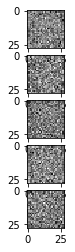

In [23]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder2.1.ckpt')
    fig, axes = plt.subplots(10,10)
    for i,ax in enumerate(axes.flat):
        template = tf.transpose(weights['in'][:,i])
        template = template.eval()
        template = template/np.max(template)
        template = template.reshape((28,28))
        ax.imshow(template, cmap = 'binary')
        #plt.show()

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder2.1.ckpt


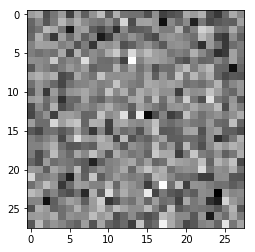

In [25]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder2.1.ckpt')
    template = tf.transpose(weights['in'][:,0])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder2.1.ckpt


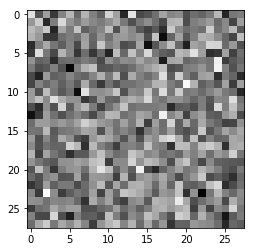

In [26]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder2.1.ckpt')
    template = tf.transpose(weights['in'][:,1])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder2.1.ckpt


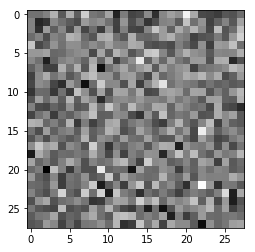

In [27]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder2.1.ckpt')
    template = tf.transpose(weights['in'][:,2])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder2.1.ckpt


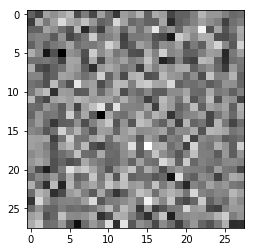

In [28]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder2.1.ckpt')
    template = tf.transpose(weights['in'][:,3])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder2.1.ckpt


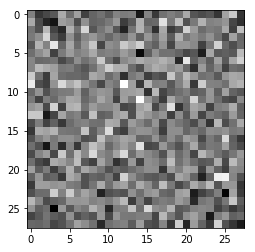

In [29]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder2.1.ckpt')
    template = tf.transpose(weights['in'][:,4])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder2.1.ckpt


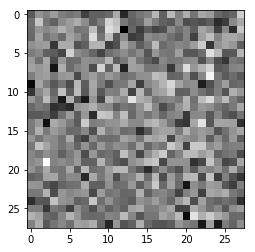

In [30]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder2.1.ckpt')
    template = tf.transpose(weights['in'][:,5])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder2.1.ckpt


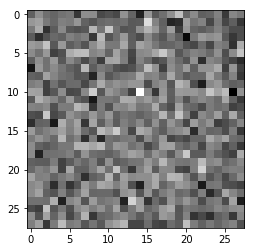

In [31]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder2.1.ckpt')
    template = tf.transpose(weights['in'][:,6])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder2.1.ckpt


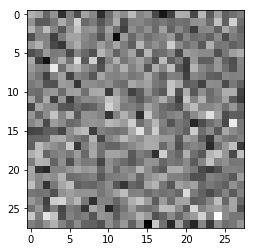

In [32]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder2.1.ckpt')
    template = tf.transpose(weights['in'][:,7])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder2.1.ckpt


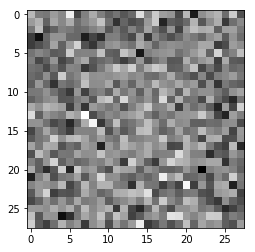

In [33]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder2.1.ckpt')
    template = tf.transpose(weights['in'][:,8])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder2.1.ckpt


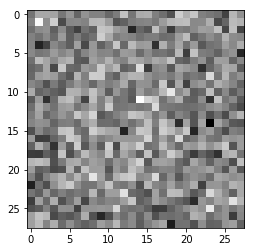

In [34]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder2.1.ckpt')
    template = tf.transpose(weights['in'][:,9])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder2.1.ckpt


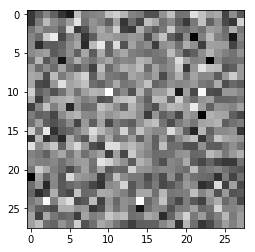

In [36]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder2.1.ckpt')
    template = tf.transpose(weights['in'][:,98])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder2.1.ckpt')
    
    for epoch in range(num_epochs):
        _, cost1, cost = sess.run([train_op1, loss_op1, loss_op], feed_dict={x:mnist.train.images})
        print('after '+str(epoch+1201)+' epochs '+'error cost is '+str(cost)+','+'sparse encoding cost is '+str(cost1))
    save_path = saver.save(sess, '/tmp/sparse_encoder1.1.ckpt')